<b style="font-size:2vw"><center>Bode Plots</center></b>

<center><i><b>Document by:</b> Matt Capuano <i></center>

I write this document as I review my Bode plots, primarly through these two resources:
- System Dynamics (Ogata) | chapter 7.2
- Control Bootcamp (Steve Brunton) | Lectures 26-...?

We describe the four common factors in transfer functions and how they are reflected/affect Bode plots. These four factors are:
- Changes in a Gain $K$
- Integral and Derivative Factors $(j\omega)^{\mp1}$
- First-Order Factors $(1+j\omega T)^{\mp1}$
- First-Order Factors $\left[1 + 2\zeta \left(\frac{j\omega}{\omega_n}\right) + \left(\frac{j\omega}{omega_n}\right)^2 \right]^{\mp1}$

In [3]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import control.matlab as cmatlab
import slycot
from scipy import signal

# Plotting settings (to format plots nicely)
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Define s as being the transfer function Laplace variable
s = cmatlab.tf('s')

In [41]:
# I'll be using the following example transfer functions:

# Spring-mass-damper system with mass, damping coefficient, and spring constant:
m = 1
d = 0.1
k = 1
G = 1 / (m*(s**2) + d*s + k)

## Changes in a Gain K

Varying a constant multiple in the transfer function raises or lowers the entire log-magnitude curve by the corresponding amount, but it has no effect on the phase angle. The conversion between the change in gain K and the change in decibels is given by:
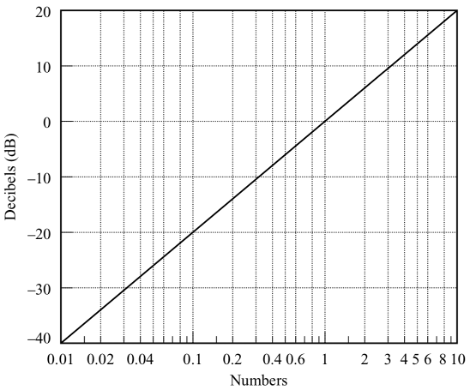


This stems from the equation from magnitude to log-magnitude:
$$
dB = 20 \log_{10}⁡(|G(j\omega)|)
$$

So an increase in magnitude by a factor of 10 corresponds to an increase of the log-magnitude by 20:
$$
20 \log⁡(K × 10^n) = 20 \log⁡(K) + 20n
$$

For instance, consider the following transfer functions for which we are just multiplying by a constant gain $K$.

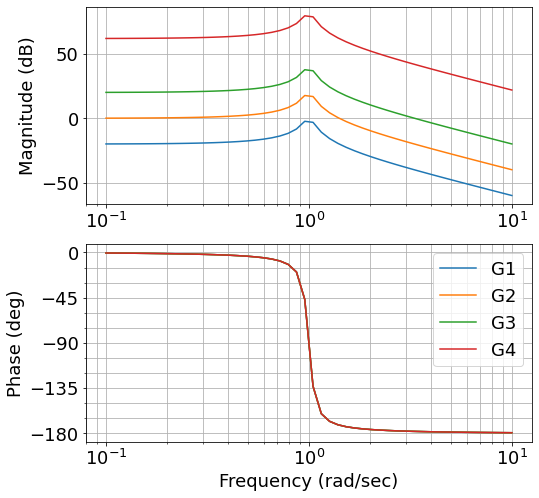

In [31]:
G1 = 0.1 * G
G2 = G
G3 = 10 * G
G4 = 1234 * G

w, mag, phase = cmatlab.bode(G1, label='G1')
w, mag, phase = cmatlab.bode(G2, label='G2')
w, mag, phase = cmatlab.bode(G3, label='G3')
w, mag, phase = cmatlab.bode(G4, label='G4')
plt.legend()

**What if the gain switches sign?**
- Then the magnitude isn't affected because $|G(j\omega)|$ would make it positive anyway.
- But the phase would change, since $tan^{-1}(numerator) - tan^{-1}(denominator)$. How does that affect it? Well think about it on the complex plain, now you've flipped everything in the directly opposite direction, which is like rotationg it by $180^o$

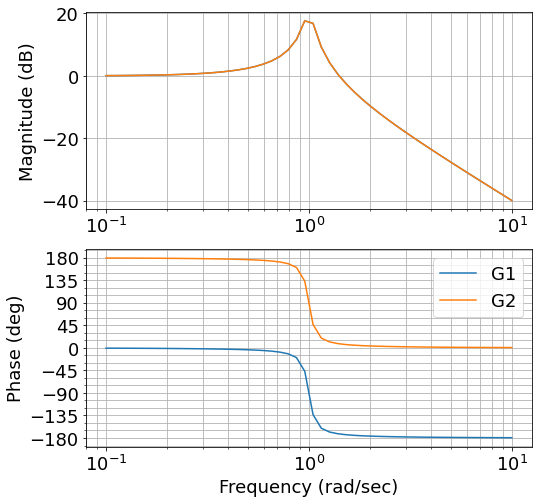

In [39]:
G1 = G
G2 = -1*G

w, mag, phase = cmatlab.bode(G1, label='G1')
w, mag, phase = cmatlab.bode(G2, label='G2')
plt.legend()

## Integral and Derivative Factors $(j\omega)^{\mp1}$

The integral and derivative factors are just negatives of each other.

Integrator:
$$
20 \log|\frac{1}{j\omega}| = -20 \log|j\omega| = -20 \log|\omega|
$$

Derivative:
$$
20 \log|j\omega| = 20 \log|\omega|
$$


They have slope of 20 and -20 on the magnitude plot respectively. Both cross the point $(\omega, dB) = (1, 0)$, as you can see from the equations above. The phase of $j\omega$ is $tan^{-1}(j\omega)$, which is directly on the imaginary axis, so it has angle $90^o$. This means the integrator has phase $-90^o$ and the derivative has phase $90^o$.

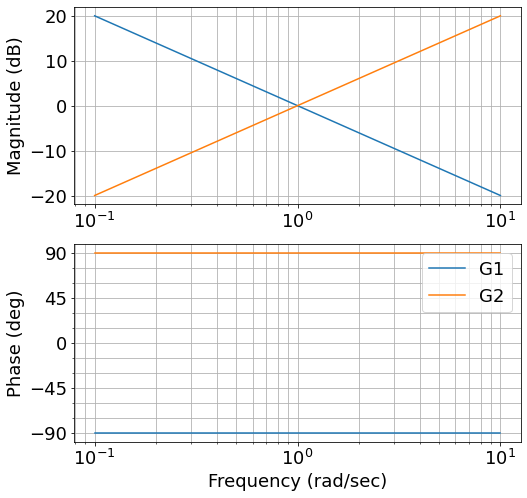

In [37]:
G1 = 1 / s
G2 = s

w, mag, phase = cmatlab.bode(G1, label='G1')
w, mag, phase = cmatlab.bode(G2, label='G2')
plt.legend()

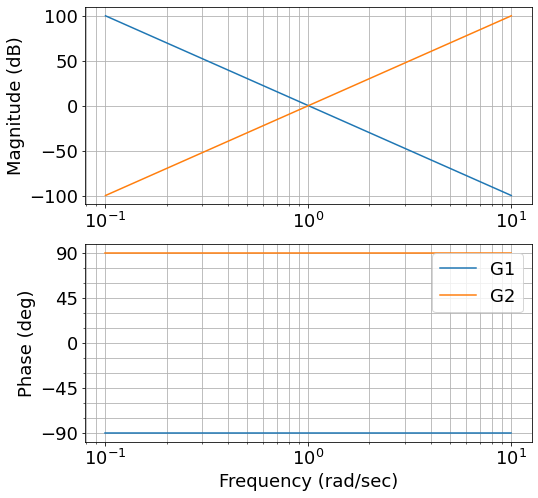

In [50]:
n = 5
G1 = 1 / (s**n)
G2 = (s**n)

w, mag, phase = cmatlab.bode(G1, label='G1')
w, mag, phase = cmatlab.bode(G2, label='G2')
plt.legend()

As a general rule, taking the reciprocal of a transfer function flips the signs of both the magnitude and phase plots:

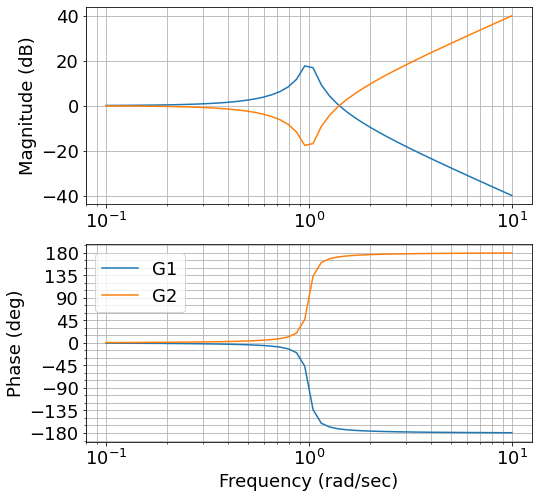

In [38]:
G1 = G
G2 = 1 / G

w, mag, phase = cmatlab.bode(G1, label='G1')
w, mag, phase = cmatlab.bode(G2, label='G2')
plt.legend()

## First-Order Factors $(1+j\omega T)^{\mp1}$

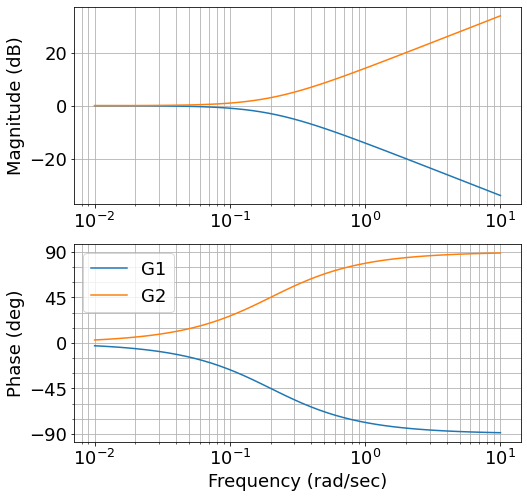

In [42]:
T = 5 # Defining the corner frequency as 1/5
G1 = 1 / (1 + T*s)
G2 = 1 + T*s

w, mag, phase = cmatlab.bode(G1, label='G1')
w, mag, phase = cmatlab.bode(G2, label='G2')
plt.legend()

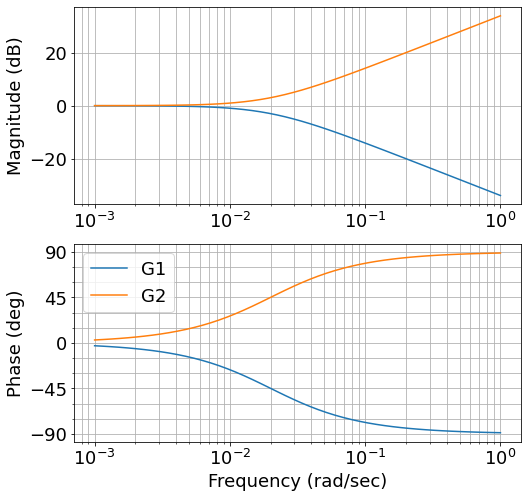

In [51]:
# Adjusting the time constant shifts the corner frequency left or right
T = 50    # Defining the corner frequency as 1/50
G1 = 1 / (1 + T*s)
G2 = 1 + T*s

w, mag, phase = cmatlab.bode(G1, label='G1')
w, mag, phase = cmatlab.bode(G2, label='G2')
plt.legend()

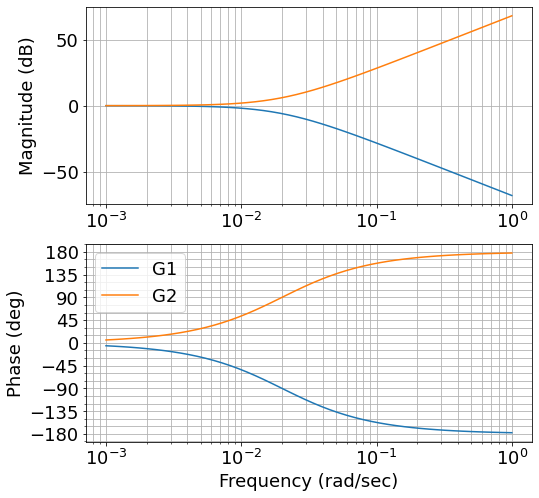

In [54]:
# Taking the First-Order factor to the power of n mutlplies the high-frequency region slope and phase angle by n
n = 2
G1 = 1 / ((1 + T*s)**n)
G2 = (1 + (T*s))**n

w, mag, phase = cmatlab.bode(G1, label='G1')
w, mag, phase = cmatlab.bode(G2, label='G2')
plt.legend()

## First-Order Factors $\left[1 + 2\zeta j\left(\frac{\omega}{\omega_n}\right) + j\left(\frac{\omega}{\omega_n}\right)^2 \right]^{\mp1}$

## Other

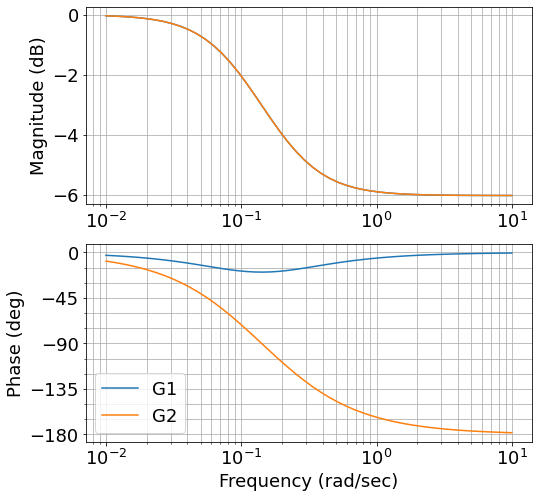

In [55]:
T = 5
T1 = 10
G1 = (1 + T * s) / (1 + T1 * s)
G2 = (1 - T * s) / (1 + T1 * s)

w, mag, phase = cmatlab.bode(G1, label='G1')
w, mag, phase = cmatlab.bode(G2, label='G2')
plt.legend()

In [66]:
import math
T = 1
L = 0.5
G = math.exp(-1*s*L) / (1 + s*T)

TypeError: must be real number, not TransferFunction

In [61]:
math.exp(1)

2.718281828459045